## **1. Business Problem**
The business problem addressed in this portfolio is to develop a reliable taxi fare prediction system that helps customers estimate trip prices before booking. At the same time, by understanding determinant factors through modeling, the company can improve pricing consistency, optimize operational decisions, and design strategies that align fare structures with real trip dynamics. This dual approach—accurate prediction and deeper insight—supports better customer transparency while strengthening the company’s internal pricing framework.  

### **Objectives**

The objective of this project is to build a machine learning model capable of predicting taxi fares based on key trip features such as distance, duration, time of day, traffic, and weather. The model will then be deployed through a Streamlit application to allow users to generate fare estimates instantly. Beyond prediction, the project also aims to identify the most influential factors behind pricing, helping the company refine fare policies and enhance strategic decision-making.  

### **Metric Evaluation**

Model performance is evaluated using three core regression metrics:

**MAE (Mean Absolute Error)** measures the average absolute difference between predicted fares and actual fares, providing a direct sense of how “off” each prediction is in currency terms.

**RMSE (Root Mean Squared Error)** penalizes larger errors more heavily, ensuring the model remains reliable even in extreme or unusual cases.

**MAPE (Mean Absolute Percentage Error)** expresses prediction error as a percentage, making it easier for the company to understand model accuracy relative to trip cost levels.

Together, these metrics give a balanced view of both practical and statistical performance, ensuring the model is accurate enough for customer-facing deployment.

### **Goals**

The goal of this project is to build a reliable and transparent taxi fare prediction system that allows users to estimate trip prices before booking, while also uncovering the key factors that drive the company’s pricing structure. By combining accurate machine learning predictions with feature-level insights, the project aims to support fairer and more consistent fare calculations, improve customer trust, and provide the company with data-driven guidance for refining future pricing strategies.

## **2. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# split
from sklearn.model_selection import train_test_split

# binning
from sklearn.preprocessing import KBinsDiscretizer

# Polynomial
from sklearn.preprocessing import PolynomialFeatures

# column transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing
# imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer, KNNImputer

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder
from category_encoders.binary import BinaryEncoder
from sklearn.preprocessing import OrdinalEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Cross Validation
from sklearn.model_selection import StratifiedKFold, KFold,cross_val_score, cross_validate

# model
from sklearn.tree import plot_tree, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
import statsmodels.api as sm
from sklearn.feature_selection import SelectFromModel

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# scoring
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

#skrub auto eda
from skrub import TableReport

from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor
)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer

import time

from sklearn.metrics import make_scorer, mean_absolute_percentage_error

#FEATURE IMPORTANCE
import shap

#LEARNING CURVE
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

import pickle

c:\Users\anovp\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## **3. Load Dataset**

In [2]:
df = pd.read_csv('taxi_trip_pricing.csv')
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [3]:
# Standardize column names
df.columns = df.columns.str.lower()
df.columns

Index(['trip_distance_km', 'time_of_day', 'day_of_week', 'passenger_count',
       'traffic_conditions', 'weather', 'base_fare', 'per_km_rate',
       'per_minute_rate', 'trip_duration_minutes', 'trip_price'],
      dtype='object')

### **Data Understanding**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trip_distance_km       950 non-null    float64
 1   time_of_day            950 non-null    object 
 2   day_of_week            950 non-null    object 
 3   passenger_count        950 non-null    float64
 4   traffic_conditions     950 non-null    object 
 5   weather                950 non-null    object 
 6   base_fare              950 non-null    float64
 7   per_km_rate            950 non-null    float64
 8   per_minute_rate        950 non-null    float64
 9   trip_duration_minutes  950 non-null    float64
 10  trip_price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [5]:
pd.set_option('display.max_colwidth', 0)
list_item = []
for col in df.columns :
    list_item.append( [col, df[col].nunique(), df[col].unique()])

info_tabel = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=list_item)
info_tabel

,Column Name,Number of Unique,Unique Sample
0,trip_distance_km,867,"[19.35, 47.59, 36.87, 30.33, nan, 8.64, 3.85, 43.44, 30.45, 35.7, 48.53, 41.79, 11.4, 9.91, 9.99, 15.91, 26.71, 22.17, 15.27, 30.98, 7.84, 105.94355003672597, 18.95, 23.35, 39.47, 10.78, 138.09832791310237, 30.03, 3.28, 30.77, 9.36, 4.19, 47.5, 48.32, 40.61, 15.93, 5.79, 34.53, 22.57, 6.98, 25.26, 2.69, 45.56, 13.68, 33.46, 16.27, 26.48, 27.79, 10.06, 48.51, 38.98, 47.04, 44.85, 30.3, 46.17, 5.34, 10.6, 3.22, 16.94, 20.05, 14.3, 41.61, 18.48, 146.0670471598387, 27.59, 7.91, 40.31, 4.65, 49.36, 38.84, 10.74, 1.27, 40.96, 35.64, 36.72, 38.79, 4.63, 18.56, 6.68, 43.29, 31.54, 17.21, 4.11, 16.93, 36.75, 44.47, 24.14, 6.86, 35.95, 38.28, 28.5, 38.78, 26.61, 21.95, 2.25, 6.29, 2.54, 32.18, 16.4, 25.92, ...]"
1,time_of_day,4,"[Morning, Afternoon, Evening, Night, nan]"
2,day_of_week,2,"[Weekday, Weekend, nan]"
3,passenger_count,4,"[3.0, 1.0, 4.0, 2.0, nan]"
4,traffic_conditions,3,"[Low, High, Medium, nan]"
5,weather,3,"[Clear, nan, Rain, Snow]"
6,base_fare,290,"[3.56, nan, 2.7, 3.48, 2.93, 2.55, 3.51, 2.97, 2.77, 3.39, 2.4, 4.78, 4.6, 4.12, 2.32, 4.33, 4.42, 4.3, 2.34, 3.93, 4.5, 3.73, 3.94, 3.38, 3.59, 3.92, 2.24, 3.31, 2.88, 3.64, 4.07, 4.39, 2.49, 2.31, 2.44, 4.63, 3.58, 3.4, 3.95, 3.88, 2.23, 2.15, 2.41, 3.16, 4.83, 3.83, 4.13, 4.21, 2.83, 3.02, 4.99, 2.79, 2.84, 4.79, 2.07, 4.09, 4.18, 4.51, 4.92, 4.93, 2.2, 4.47, 2.39, 4.95, 4.74, 3.32, 2.12, 3.09, 4.48, 4.1, 2.17, 3.28, 3.41, 3.08, 3.43, 3.07, 4.05, 3.99, 4.15, 2.8, 2.95, 2.38, 3.97, 3.79, 4.61, 3.35, 4.01, 4.46, 2.73, 3.26, 4.52, 3.65, 2.58, 4.73, 4.28, 4.53, 3.03, 2.27, 4.27, 3.75, ...]"
7,per_km_rate,150,"[0.8, 0.62, 1.21, 0.51, 0.63, 1.71, 1.66, 1.87, 1.78, 1.52, 0.58, nan, 1.77, 1.26, 0.85, 1.59, 1.97, 0.73, 0.84, 0.82, 1.69, 0.78, 0.6, 0.54, 1.75, 1.05, 1.76, 1.33, 1.85, 1.89, 0.61, 0.88, 1.5, 1.83, 1.41, 1.95, 0.9, 1.25, 0.72, 1.16, 1.0, 1.28, 1.38, 1.64, 1.57, 1.63, 1.93, 0.86, 0.99, 1.37, 1.03, 1.55, 1.34, 1.08, 1.13, 1.82, 1.56, 1.88, 0.91, 1.35, 1.91, 1.61, 1.12, 0.57, 0.79, 1.18, 0.95, 1.62, 0.68, 1.3, 1.39, 0.69, 1.31, 1.9, 0.96, 1.8, 1.65, 0.87, 0.55, 0.65, 1.06, 0.67, 1.11, 1.23, 1.73, 0.76, 1.54, 0.71, 1.29, 1.46, 1.01, 1.86, 1.17, 1.24, 1.84, 1.53, 1.79, 0.98, 0.77, 0.7, ...]"
8,per_minute_rate,41,"[0.32, 0.43, 0.15, 0.48, nan, 0.23, 0.34, 0.47, 0.5, 0.11, 0.21, 0.2, 0.41, 0.12, 0.25, 0.3, 0.39, 0.24, 0.35, 0.33, 0.36, 0.13, 0.19, 0.44, 0.38, 0.42, 0.26, 0.18, 0.17, 0.29, 0.28, 0.31, 0.37, 0.46, 0.16, 0.4, 0.1, 0.27, 0.49, 0.45, 0.14, 0.22]"
9,trip_duration_minutes,917,"[53.82, 40.57, 37.27, 116.81, 22.64, 89.33, 5.05, nan, 110.33, 26.34, 79.94, 86.95, 84.12, 41.72, 34.0, 114.93, 111.18, 57.59, 57.02, 53.8, 23.03, 54.04, 66.8, 7.59, 56.07, 94.86, 83.21, 78.04, 109.6, 7.07, 69.06, 95.55, 67.25, 42.25, 20.67, 107.07, 59.14, 105.98, 72.37, 82.53, 97.49, 80.8, 50.78, 64.07, 97.35, 47.97, 49.63, 16.0, 110.18, 15.47, 79.54, 52.52, 51.65, 83.15, 12.72, 73.28, 93.78, 100.24, 24.61, 108.2, 106.41, 60.81, 67.33, 110.69, 108.49, 56.54, 36.56, 50.21, 49.59, 37.99, 35.89, 104.02, 13.03, 82.93, 24.87, 44.62, 12.08, 36.05, 93.37, 106.78, 30.48, 58.31, 59.09, 105.46, 92.72, 64.0, 82.14, 102.45, 6.1, 51.33, 109.33, 90.14, 67.43, 65.91, 44.99, 80.37, 53.11, 87.13, 104.04, 22.79, ...]"


#### **Data Overview**

1. This dataset contains of 1000 rows and 11 columns.
2. There are 10 features and 1 target variable in this dataset.
3. The features consist of 6 numerical and 4 categorical data types.

#### **Columns Description**
---
##### **Features**
---
- trip_distance_km (in kilometers): The length of the trip.
    - Data Type: Numerical (float)
---
- time_of_day : The time of the trip.
    - Data Type: Object
    - Unique Values : Morning, Afternoon, Evening, Night
---
- day_of_week: The day of the week when the trip occurred.
    - Data Type: Object
    - Unique Values : Weekend, Weekday
---
- passenger_count : Number of passengers for the trip.
    - Data Type: Numerical (float)
---
- traffic_condition: Categorical indicator of traffic (low, medium, high).
    - Data Type: Object
---
- weather: Categorical data for weather (clear, rain, snow).
    - Data Type: Object
---
- base_fare (in USD): The initial fare for the trip.
    - Data Type: Numerical (float)
---
- per_km_rate (in USD/km): The rate charged per kilometer.
    - Data Type: Numerical (float)
---
- per_minute_rate (in USD/min): The rate charged per minute.
    - Data Type: Numerical (float)
---
- trip_duration_minutes: The duration of the trip in minutes.
    - Data Type: Numerical (float)
---
##### **Target Variable**
---
- trip_price (in USD): The total fare for the trip.
    - Data Type: Numerical (float)

### **Data Cleaning**

#### **Missing Value Check**

In [6]:
#Missing Value Check
df.isnull().sum()

trip_distance_km         50
time_of_day              50
day_of_week              50
passenger_count          50
traffic_conditions       50
weather                  50
base_fare                50
per_km_rate              50
per_minute_rate          50
trip_duration_minutes    50
trip_price               49
dtype: int64

- Plenty of missing values found in the dataset. Will be imputed using several methods such as mean, median, or mode based on the nature of the data and the extent of missingness.
- Missing values in target variable 'trip_price' will be removed to ensure the integrity of the analysis.

In [7]:
#Drop target variable missing value
df = df.dropna(subset=['trip_price']).reset_index(drop=True)

In [8]:
df.isnull().sum()

trip_distance_km         50
time_of_day              49
day_of_week              46
passenger_count          48
traffic_conditions       50
weather                  46
base_fare                44
per_km_rate              44
per_minute_rate          49
trip_duration_minutes    46
trip_price               0 
dtype: int64

- Missing values in target variable have been removed.

#### **Duplicate Check**

In [9]:
df.duplicated().sum()

np.int64(0)

- No duplicates found in the dataset.

## **4. Exploratory Data Analysis**

### **Descriptive Analysis**

In [10]:
df.describe()

,trip_distance_km,passenger_count,base_fare,per_km_rate,per_minute_rate,trip_duration_minutes,trip_price
count,901.000000,903.000000,907.000000,907.000000,902.000000,905.000000,951.000000
mean,27.190998,2.479513,3.497100,1.229934,0.293902,62.044144,56.874773
std,20.155134,1.100983,0.866729,0.429958,0.115404,32.321578,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.630000,2.000000,2.730000,0.850000,0.190000,35.590000,33.742650
50%,25.870000,2.000000,3.510000,1.220000,0.290000,61.570000,50.074500
75%,38.680000,3.000000,4.230000,1.610000,0.390000,89.210000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


### **Outlier Check**

In [11]:
#trip_distance_km column
Q1 = df['trip_distance_km'].quantile(0.25)
Q3 = df['trip_distance_km'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['trip_distance_km'] < lower_bound) | (df['trip_distance_km'] > upper_bound)]
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"trip_distance_km outliers count: {len(outliers)}")

Lower bound: -26.444999999999993
Upper bound: 77.755
trip_distance_km outliers count: 20


In [12]:
outliers

,trip_distance_km,time_of_day,day_of_week,passenger_count,traffic_conditions,weather,base_fare,per_km_rate,per_minute_rate,trip_duration_minutes,trip_price
19,105.943550,Night,Weekend,2.0,Low,Rain,3.94,1.69,0.32,23.03,201.869509
24,138.098328,Evening,Weekend,4.0,Medium,Rain,2.24,1.75,0.32,94.86,280.877302
60,146.067047,Afternoon,Weekday,2.0,Medium,Clear,4.79,0.73,0.30,60.81,320.958664
103,112.830958,Afternoon,Weekday,2.0,High,Snow,3.35,1.90,0.23,78.63,233.008285
104,102.747556,Evening,Weekday,2.0,Medium,Clear,2.23,1.80,0.23,53.09,274.535087
134,109.616082,Afternoon,Weekday,4.0,High,Clear,4.46,1.69,0.23,53.88,327.217665
212,130.809001,Afternoon,Weekday,1.0,High,Clear,3.93,0.63,0.16,88.31,328.871769
249,116.196064,Afternoon,Weekend,4.0,Medium,Clear,2.20,0.85,0.25,19.63,206.699570
250,139.062230,Afternoon,Weekday,2.0,Low,Rain,2.80,1.82,0.14,50.83,276.840597
266,100.380420,Afternoon,Weekday,3.0,Medium,Rain,4.46,NaN,NaN,89.21,329.913004


- Since there's several impossible speed (trip_distance_km / trip_duration_minutes) found in the dataset, we will make new column called 'speed_km_per_min' to identify the outliers.

In [13]:
#passenger_count column
Q1 = df['passenger_count'].quantile(0.25)
Q3 = df['passenger_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['passenger_count'] < lower_bound) | (df['passenger_count'] > upper_bound)]
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"passenger_count outliers count: {len(outliers)}")

Lower bound: 0.5
Upper bound: 4.5
passenger_count outliers count: 0


In [14]:
#base_fare column
Q1 = df['base_fare'].quantile(0.25)
Q3 = df['base_fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['base_fare'] < lower_bound) | (df['base_fare'] > upper_bound)]
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"base_fare outliers count: {len(outliers)}")

Lower bound: 0.4799999999999991
Upper bound: 6.480000000000001
base_fare outliers count: 0


In [15]:
#per_km_rate column
Q1 = df['per_km_rate'].quantile(0.25)
Q3 = df['per_km_rate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['per_km_rate'] < lower_bound) | (df['per_km_rate'] > upper_bound)]
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"per_km_rate outliers count: {len(outliers)}")

Lower bound: -0.29000000000000015
Upper bound: 2.75
per_km_rate outliers count: 0


In [16]:
#per_minute_rate column
Q1 = df['per_minute_rate'].quantile(0.25)
Q3 = df['per_minute_rate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['per_minute_rate'] < lower_bound) | (df['per_minute_rate'] > upper_bound)]
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"per_minute_rate outliers count: {len(outliers)}")

Lower bound: -0.11000000000000004
Upper bound: 0.6900000000000001
per_minute_rate outliers count: 0


In [17]:
#trip_duration_minutes column
Q1 = df['trip_duration_minutes'].quantile(0.25)
Q3 = df['trip_duration_minutes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['trip_duration_minutes'] < lower_bound) | (df['trip_duration_minutes'] > upper_bound)]
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"trip_duration_minutes outliers count: {len(outliers)}")

Lower bound: -44.839999999999975
Upper bound: 169.64
trip_duration_minutes outliers count: 0


In [18]:
#trip_price column
Q1 = df['trip_price'].quantile(0.25)
Q3 = df['trip_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['trip_price'] < lower_bound) | (df['trip_price'] > upper_bound)]
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"trip_price outliers count: {len(outliers)}")

Lower bound: -19.292400000000008
Upper bound: 122.1344
trip_price outliers count: 26


- Outliers found in two numerical columns: trip_distance_km and trip_price.

#### **Make New Column 'speed_km_per_hour'**

In [19]:
df['speed_km_per_hour'] = df['trip_distance_km'] / (df['trip_duration_minutes'] / 60)

In [20]:
#Outlier Detection on 'speed_km_per_hour' column
Q1 = df['speed_km_per_hour'].quantile(0.25)
Q3 = df['speed_km_per_hour'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['speed_km_per_hour'] < lower_bound) | (df['speed_km_per_hour'] > upper_bound)]
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"speed_km_per_hour outliers count: {len(outliers)}")

Lower bound: -42.73675636893188
Upper bound: 103.73750799669426
speed_km_per_hour outliers count: 81


In [21]:
df[(df['speed_km_per_hour'] > 120)]

,trip_distance_km,time_of_day,day_of_week,passenger_count,traffic_conditions,weather,base_fare,per_km_rate,per_minute_rate,trip_duration_minutes,trip_price,speed_km_per_hour
19,105.943550,Night,Weekend,2.0,Low,Rain,3.94,1.69,0.32,23.03,201.869509,276.014459
22,39.470000,Afternoon,Weekday,1.0,Low,Clear,NaN,NaN,0.35,7.59,83.696500,312.015810
47,38.980000,Afternoon,Weekday,3.0,Low,Clear,3.16,1.28,0.26,15.47,57.076600,151.182935
60,146.067047,Afternoon,Weekday,2.0,Medium,Clear,4.79,0.73,0.30,60.81,320.958664,144.121408
71,36.720000,NaN,Weekend,NaN,Low,Clear,2.39,1.56,0.17,13.03,61.888300,169.086723
...,...,...,...,...,...,...,...,...,...,...,...,...
740,32.420000,Evening,Weekday,4.0,Low,Clear,2.58,1.41,0.11,14.18,49.852000,137.179126
759,46.200000,Morning,NaN,1.0,Medium,Clear,2.93,1.46,0.43,16.33,77.403900,169.748928
795,126.547628,Afternoon,Weekend,1.0,Low,NaN,4.23,0.85,0.28,29.30,224.914663,259.141901
852,15.360000,Afternoon,Weekday,1.0,Low,Clear,3.49,0.74,0.34,6.06,16.916800,152.079208


- In general, vehicles in urban areas travel at **speeds of around 30–60 km/h under normal conditions**. For the purpose of outlier detection, **a maximum threshold of 120 km/h is used**, which is twice the upper limit of normal speeds. Observations with **speeds exceeding this value are considered anomalies**, as they are not realistic for taxi trips.
- So we will use 120 km/h as the upper bound for outlier detection, and drop the outliers found in this column.

In [22]:
#Drop outliers from 'speed_km_per_hour' column (>120 km/h)
df[df['speed_km_per_hour'] <= 120].reset_index(drop=True)


,trip_distance_km,time_of_day,day_of_week,passenger_count,traffic_conditions,weather,base_fare,per_km_rate,per_minute_rate,trip_duration_minutes,trip_price,speed_km_per_hour
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624,21.571906
1,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032,59.356050
2,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698,15.579146
3,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028,5.803202
4,3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,NaN,5.05,11.2645,45.742574
...,...,...,...,...,...,...,...,...,...,...,...,...
789,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049,5.641377
790,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295,44.496449
791,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236,8.527132
792,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090,24.826866


#### **Validating trip_price based on per_km_rate, per_minute_rate, trip_distance_km, and trip_duration_minutes** 

In [23]:
df['estimated_price'] = (df['base_fare'] + (df['per_km_rate'] * df['trip_distance_km']) + (df['per_minute_rate'] * df['trip_duration_minutes']))
df['estimated_price_difference'] = abs(df['trip_price'] - df['estimated_price'])
df['price_diff_percentage'] = (df['estimated_price_difference'] / df['estimated_price']) * 100


In [24]:
df[df['price_diff_percentage'] > 20]
df

,trip_distance_km,time_of_day,day_of_week,passenger_count,traffic_conditions,weather,base_fare,per_km_rate,per_minute_rate,trip_duration_minutes,trip_price,speed_km_per_hour,estimated_price,estimated_price_difference,price_diff_percentage
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624,21.571906,36.2624,0.000000e+00,0.000000e+00
1,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032,59.356050,52.9032,0.000000e+00,0.000000e+00
2,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698,15.579146,36.4698,0.000000e+00,0.000000e+00
3,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180,NaN,NaN,NaN,NaN
4,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028,5.803202,60.2028,7.105427e-15,1.180249e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049,5.641377,34.4049,0.000000e+00,0.000000e+00
947,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295,44.496449,NaN,NaN,NaN
948,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236,8.527132,NaN,NaN,NaN
949,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090,24.826866,61.2090,0.000000e+00,0.000000e+00


- **We set a threshold of 20% difference between the actual trip_price and the estimated price** calculated using the formula:
  
  **estimated_price = base_fare + (per_km_rate * trip_distance_km) + (per_minute_rate * trip_duration_minutes)**
  
- Observations with a price difference percentage greater than 20% are considered anomalies and will be removed from the dataset.

In [25]:
#Drop outliers from 'price_diff_percentage' column (>20%)
df[df['price_diff_percentage'] <= 20].reset_index(drop=True)

,trip_distance_km,time_of_day,day_of_week,passenger_count,traffic_conditions,weather,base_fare,per_km_rate,per_minute_rate,trip_duration_minutes,trip_price,speed_km_per_hour,estimated_price,estimated_price_difference,price_diff_percentage
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624,21.571906,36.2624,0.000000e+00,0.000000e+00
1,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032,59.356050,52.9032,0.000000e+00,0.000000e+00
2,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698,15.579146,36.4698,0.000000e+00,0.000000e+00
3,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028,5.803202,60.2028,7.105427e-15,1.180249e-14
4,41.79,Night,Weekend,3.0,High,Clear,4.60,1.77,0.11,86.95,88.1328,28.837263,88.1328,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,40.17,Evening,Weekday,3.0,Low,Clear,3.81,0.66,0.42,62.66,56.6394,38.464730,56.6394,7.105427e-15,1.254503e-14
717,14.34,Afternoon,Weekday,1.0,Medium,Clear,3.23,1.01,0.29,45.07,30.7837,19.090304,30.7837,0.000000e+00,0.000000e+00
718,18.69,Evening,Weekday,3.0,Medium,Clear,4.90,1.79,0.17,79.41,51.8548,14.121647,51.8548,0.000000e+00,0.000000e+00
719,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049,5.641377,34.4049,0.000000e+00,0.000000e+00


#### **Dropping Column 'speed_km_per_hour', 'estimated_price', 'estimated_price_difference', and 'price_diff_percentage'**
- After the outlier detection and removal process, the columns 'speed_km_per_hour', 'estimated_price', 'estimated_price_difference', and 'price_diff_percentage' are no longer needed for further analysis. Therefore, these columns will be dropped from the dataset to streamline the data and focus on the relevant features for subsequent analysis.

In [26]:
df = df.drop(columns=['speed_km_per_hour', 'estimated_price', 'estimated_price_difference', 'price_diff_percentage'])

In [27]:
df.head()

,trip_distance_km,time_of_day,day_of_week,passenger_count,traffic_conditions,weather,base_fare,per_km_rate,per_minute_rate,trip_duration_minutes,trip_price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
2,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
3,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
4,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028


### **Numerical Data Distribution**

In [28]:
num_cols = df.select_dtypes(include=['float64']).columns

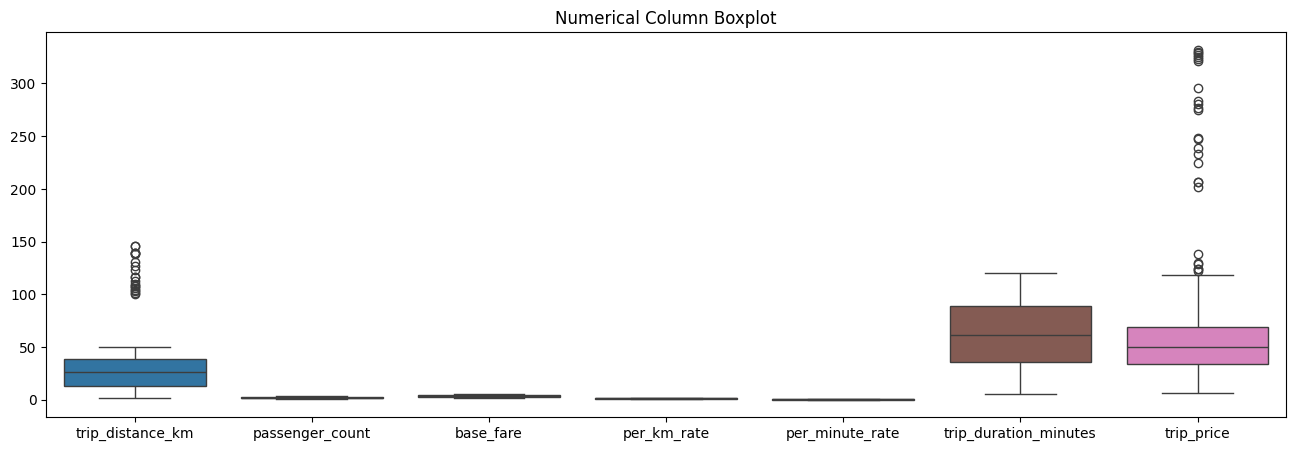

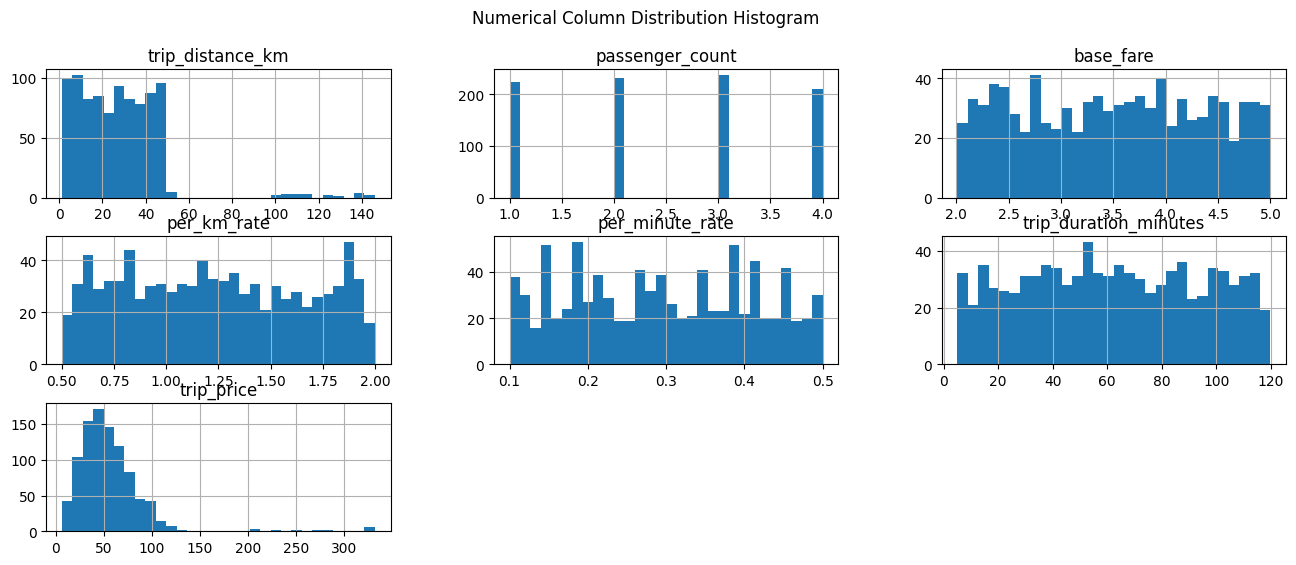

In [29]:
plt.figure(figsize=(16,5))
sns.boxplot(data=df[num_cols])
plt.title('Numerical Column Boxplot')
plt.show()

df[num_cols].hist(figsize=(16,6), bins=30)
plt.suptitle('Numerical Column Distribution Histogram')
plt.show()

### **Correlation Analysis**

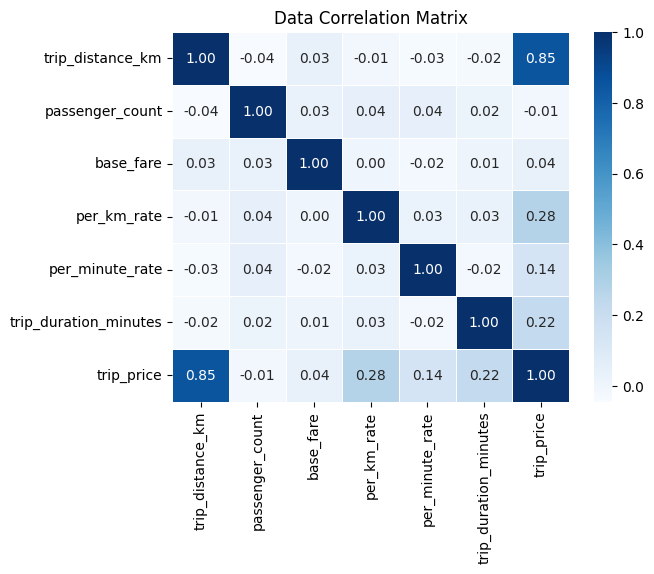

In [30]:
#CORRELATION MATRIX
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title("Data Correlation Matrix")
plt.show()

- **trip_distance_km column shows a significant high correlation with trip_price(0.85).** Indicating that longer trips tend to have higher prices (as expected).
- **per_km_rate and trip_duration_minutes also show moderate positive correlations with trip_price (0.28 and 0.22 respectively).** This suggests that both the distance rate and duration of the trip contribute to the overall fare, but are less influential than the trip distance itself.
- **The pricing of this taxi service is primarily driven by the distance traveled**, with additional contributions from the rate per kilometer and the duration of the trip.

### **Categorical Data Distribution**

In [31]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['time_of_day', 'day_of_week', 'traffic_conditions', 'weather']

In [32]:
for col in categorical_cols:
    print(col, df[col].unique())

time_of_day ['Morning' 'Evening' 'Afternoon' 'Night' nan]
day_of_week ['Weekday' 'Weekend' nan]
traffic_conditions ['Low' 'High' 'Medium' nan]
weather ['Clear' nan 'Rain' 'Snow']


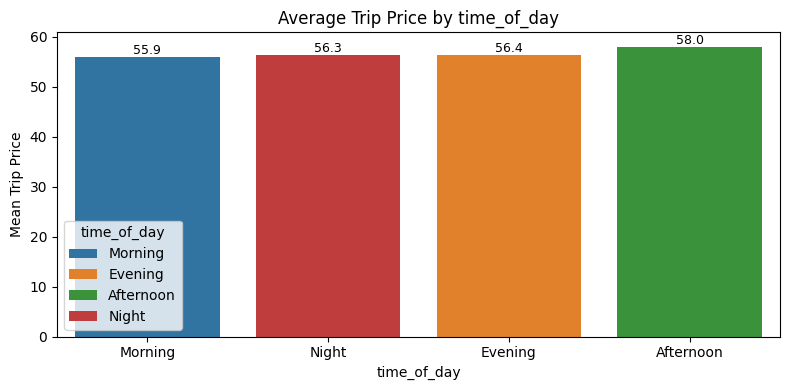

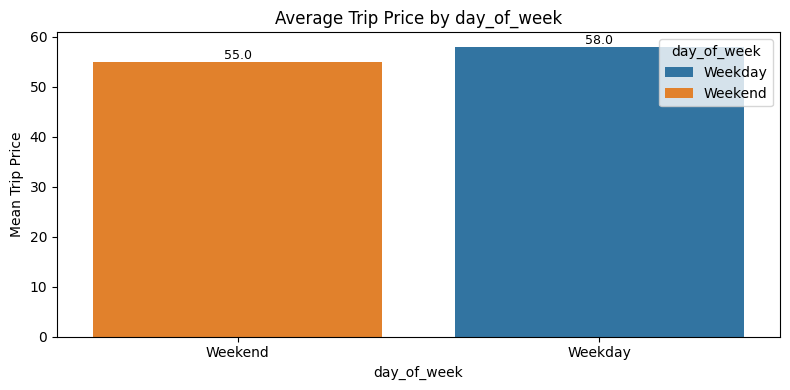

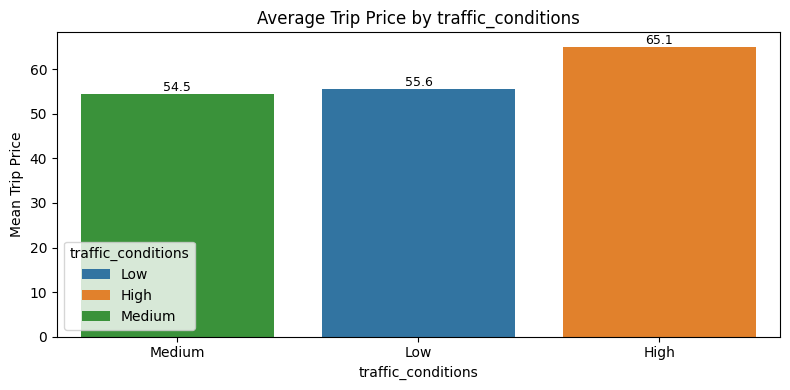

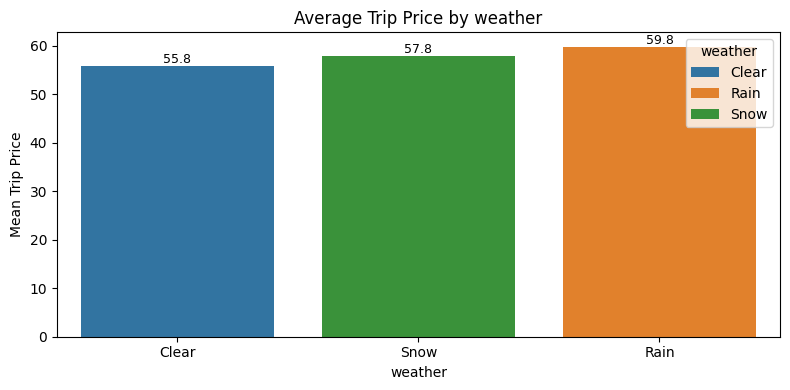

In [33]:
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    ax = sns.barplot(
        data=df,
        x=col,
        y='trip_price',
        estimator='mean',
        order= df.groupby(col)['trip_price'].mean().sort_values().index,
        errorbar=None,
        hue=col
    )
    plt.title(f'Average Trip Price by {col}')
    plt.xlabel(col)
    plt.ylabel("Mean Trip Price")
    plt.xticks(rotation=0)

    # label each bar with the mean value
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f', fontsize=9)

    plt.tight_layout()
    plt.show()

- **Trip prices tend to be higher during the Afternoon and Evening** compared to Morning and Night.
- **Trip prices are generally higher on Weekdays** compared to Weekends.
- **Trip prices tend to be higher in Rain weather conditions** compared to Snow and Clear.
- **Trip prices tend to be higher in High traffic conditions** compared to Medium and Low.

### **Save Cleaned CSV**

In [34]:
df.to_csv('taxi_fare_cleaned.csv', index=False)

## **5. Define X and y**

In [35]:
X = df.drop('trip_price', axis=1)
y = df['trip_price']

## **6. Data Splitting**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **7. Data Preprocessing**

### **Separating Numerical and Categorical Features**

In [37]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['trip_distance_km', 'passenger_count', 'base_fare', 'per_km_rate', 'per_minute_rate', 'trip_duration_minutes']
Categorical Features: ['time_of_day', 'day_of_week', 'traffic_conditions', 'weather']


### **Ordinal Encoding on Categorical Features**

In [38]:
special_ordinal_col = ['traffic_conditions']

In [39]:
df['traffic_conditions'].unique()

array(['Low', 'High', 'Medium', nan], dtype=object)

In [40]:
traffic_encoder = OrdinalEncoder(
    categories=[['Low', 'Medium', 'High']],
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

In [41]:
# Separate categorical features into ordinal and general categorical
general_categorical = [col for col in categorical_features if col not in special_ordinal_col]

In [42]:
#One Hot Encoder for general categorical features
cat_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

### **Define Imputer for Numerical and Categorical Features**
We use simple imputer for both numerical and categorical features. For numerical features, we use 'median' strategy to handle missing values since the data is not normally distributed, while for categorical features, we use 'most_frequent' strategy.

In [43]:
#Imputer  
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
#Scaler  
num_scaler = RobustScaler()

### **Scaling Numerical Features**
We use RobustScaler to scale numerical features. RobustScaler is less sensitive to outliers compared to other scaling methods like StandardScaler or MinMaxScaler, making it suitable for our dataset which contains outliers.

In [44]:
#Scaler  
num_scaler = RobustScaler()

### **Preprocessing Pipelines: With Scaling vs Without Scaling**
We create two separate preprocessing pipelines: one that includes scaling for numerical features and another that does not include scaling. This allows us to compare the performance of models trained on scaled versus unscaled data. 

In [45]:
#Preprocessing Pipeline (Scaling)
prepo_scaling = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', num_imputer),
        ('scaler', num_scaler)
    ]), numerical_features),

    ('traffic_ord', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinal', traffic_encoder)
    ]), special_ordinal_col),

    ('cat', Pipeline([
        ('imputer', cat_imputer),
        ('onehot', cat_encoder)
    ]), general_categorical)

], remainder='passthrough')

In [46]:
#Preprocessing Pipeline (no Scaling)
prepo_noscaling = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', num_imputer)
    ]), numerical_features),

    ('traffic_ord', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinal', traffic_encoder)
    ]), special_ordinal_col),

    ('cat', Pipeline([
        ('imputer', cat_imputer),
        ('onehot', cat_encoder)
    ]), general_categorical)

], remainder='passthrough')

In [47]:
log_transformer = FunctionTransformer(np.log1p, inverse_func=np.expm1)

### **Model Pipeline**

In [48]:
scaling_models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor()
}

non_scaling_models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(verbose=False, random_state=42)
}



In [49]:
scaled_pipelines = {
    name: TransformedTargetRegressor(
        regressor=Pipeline([
            ('preprocess', prepo_scaling),
            ('model', model)
        ]),
        transformer=log_transformer
    )
    for name, model in scaling_models.items()
}

In [50]:
non_scaled_pipelines = {
    name: TransformedTargetRegressor(
        regressor=Pipeline([
            ('preprocess', prepo_noscaling),
            ('model', model)
        ]),
        transformer=log_transformer
    )
    for name, model in non_scaling_models.items()
}

In [51]:
all_models = {**scaled_pipelines, **non_scaled_pipelines}

## **8. Cross Validation**

In [52]:
rmse_scorer = make_scorer(
    lambda y_true, y_pred: np.sqrt(np.mean((y_true - y_pred)**2)),
    greater_is_better=False
)

results = []

for name, model in all_models.items():
    
    start = time.time()
    
    # Cross-validation on TRAINING data
    mae_scores = cross_val_score(model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='neg_mean_absolute_error')
    mape_scores = cross_val_score(model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='neg_mean_absolute_percentage_error')
    rmse_scores = cross_val_score(model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='r2')
    
    end = time.time()
    duration = end - start
    
    results.append({
        'Model': name,
        'MAE': -mae_scores.mean(),
        'MAPE(%)': -mape_scores.mean()*100,
        'RMSE': -rmse_scores.mean(),
        'R2': r2_scores.mean(),
        'Time (seconds)': duration
    })

leaderboard = pd.DataFrame(results).sort_values(by='RMSE').reset_index(drop=True)
leaderboard

,Model,MAE,MAPE(%),RMSE,R2,Time (seconds)
0,Random Forest,5.987542,11.696731,10.183519,0.924137,5.514853
1,Gradient Boosting,5.272895,9.978113,10.766057,0.911293,2.325961
2,AdaBoost,9.226998,17.443560,13.620098,0.867460,1.899974
3,Decision Tree,9.633873,19.045421,14.446044,0.847536,0.385171
4,XGBoost,6.529792,11.646607,15.225964,0.826020,1.533386
5,CatBoost,5.538830,8.857996,15.511302,0.827376,17.657721
6,KNN,12.799389,28.804006,17.398700,0.783111,2.080620
7,Linear Regression,9.441562,16.358461,28.597666,0.174306,0.358074


Based on the cross-validation results, we can observe the following:
- Best Model that we can use is Gradient Boosting Regressor, which has the 2nd lowest RMSE but relatively fast training time compared to RandomForest.

## **9. Hyperparameter Tuning**

### **Gradient Boosting Tuning**

In [53]:
all_models = {**scaled_pipelines, **non_scaled_pipelines}
gb_pipeline = all_models['Gradient Boosting']

Include the default parameter values for parameter

In [54]:
param_distributions = {
    'regressor__model__n_estimators': [100,150,200],         # default = 100
    'regressor__model__learning_rate': [0.05, 0.1],        # default = 0.1
    'regressor__model__max_depth': [2, 3, 4],                   # default = 3
    'regressor__model__subsample': [1.0, 0.9, 0.8],             # default = 1.0
    'regressor__model__min_samples_split': [2, 5, 10],          # default = 2
    'regressor__model__min_samples_leaf': [3, 5, 8, 10],            # default = 1
}

648 possible combinations, so we will use RandomizedSearchCV with half + 1 of the possible combinations (325 iterations) to find the best hyperparameters for the Gradient Boosting Regressor model.

In [55]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=gb_pipeline,
    param_distributions=param_distributions,
    n_iter=325,     
    scoring=rmse_scorer,
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [56]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 325 candidates, totalling 1625 fits


,estimator,TransformedTa...unc 'expm1'>))
,param_distributions,"{'regressor__model__learning_rate': [0.05, 0.1], 'regressor__model__max_depth': [2, 3, ...], 'regressor__model__min_samples_leaf': [3, 5, ...], 'regressor__model__min_samples_split': [2, 5, ...], ...}"
,n_iter,325
,scoring,make_scorer(<...hod='predict')
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [57]:
print("Best Params:", random_search.best_params_)
print("Best RMSE:", -random_search.best_score_)

Best Params: {'regressor__model__subsample': 0.9, 'regressor__model__n_estimators': 100, 'regressor__model__min_samples_split': 10, 'regressor__model__min_samples_leaf': 8, 'regressor__model__max_depth': 4, 'regressor__model__learning_rate': 0.1}
Best RMSE: 9.96977492854845


### **RMSE Before and After Tuning on Train Set**

**Gradient Boosting Regressor**
 - Benchmark RMSE (before tuning): 10.7660
 - Tuned RMSE (after tuning): 9.9697

Based on the hyperparameter tuning results, we can see that the RMSE has improved from 10.7660 to 9.9697 after tuning the hyperparameters of the Gradient Boosting Regressor model. This indicates that the tuning process was effective in enhancing the model's performance on the training set.

**Best Hyperparameters - Gradient Boosting**

| Hyperparameter                      | Best Value |
|------------------------------------|-------------|
| modeling__regressor__subsample        | 0.9         |
| modeling__regressor__n_estimators     | 100         |
| modeling__regressor__min_samples_split| 10          |
| modeling__regressor__min_samples_leaf | 8          |
| modeling__regressor__max_depth        | 4           |
| modeling__regressor__learning_rate    | 0.1      |

In [58]:
best_gb_model = random_search.best_estimator_
best_gb_model

,regressor,Pipeline(step...sample=0.9))])
,transformer,FunctionTrans...func 'expm1'>)
,func,None
,inverse_func,None
,check_inverse,True
,transformers,"[('num', ...), ('traffic_ord', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False


## **10. Final Evaluation on Test Set**

In [59]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [60]:
y_pred_train = best_gb_model.predict(X_train)
y_pred_test  = best_gb_model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test  = np.sqrt(mean_squared_error(y_test, y_pred_test))

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test  = mean_absolute_error(y_test, y_pred_test)

mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("RMSE Train:", rmse_train)
print("RMSE Test :", rmse_test)
print("MAE Train:", mae_train)
print("MAE Test :", mae_test)
print("MAPE Train (%):", mape_train*100)
print("MAPE Test (%):", mape_test*100)

RMSE Train: 5.986607503262566
RMSE Test : 12.434368118042704
MAE Train: 2.7974019651096134
MAE Test : 5.452049009766272
MAPE Train (%): 4.950222752190666
MAPE Test (%): 8.56556032562632


## **11. Learning Curve (Detect Underfitting / Overfitting)**

Use R^2 for scoring cause its scale-independent

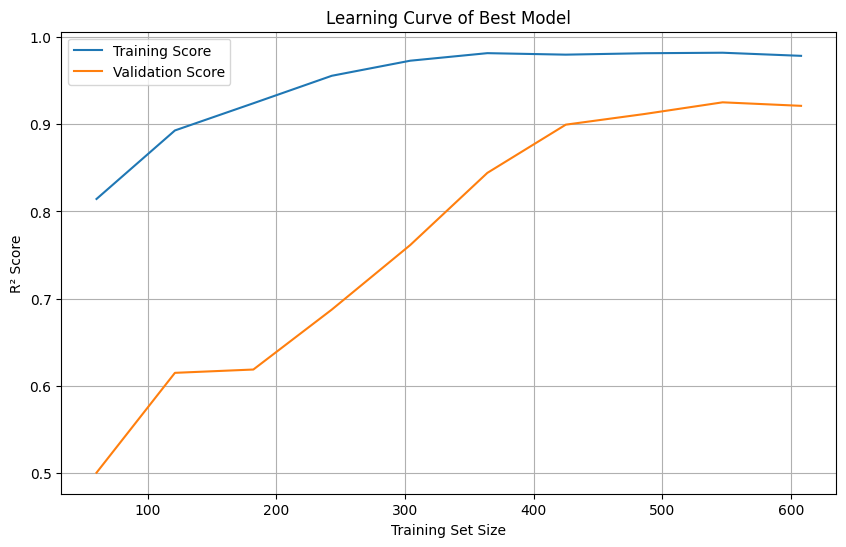

In [61]:
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_gb_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, val_mean, label='Validation Score')
plt.title("Learning Curve of Best Model")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.grid()
plt.legend()
plt.show()

- The learning curve shows that **the model generalizes well**: the **validation score consistently increases** as **the training size grows**, while **the gap between training and validation curves becomes smaller**.
- The model benefits from more data, **adding additional training samples would likely help improve generalization even further.**
- Both curves approach a stable region, indicating that **the model is neither underfitting nor severely overfitting.**

## **12. Residual Analysis on Test**

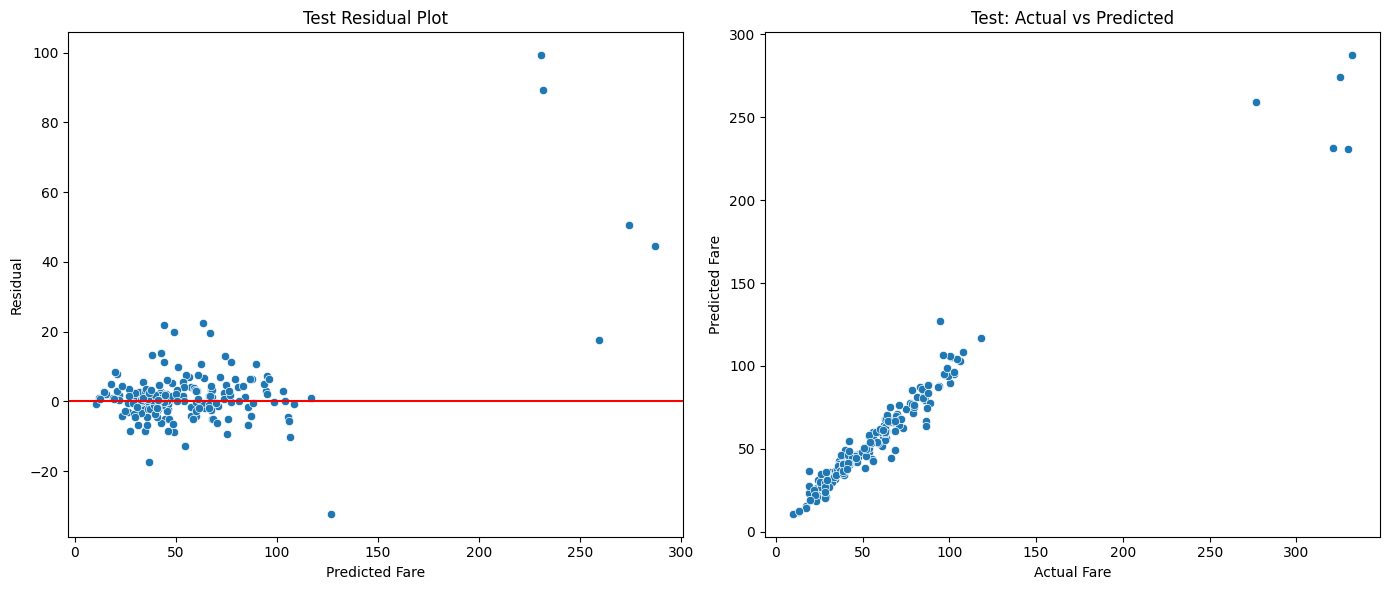

In [62]:
df_test_res = pd.DataFrame({
    'y_test': y_test,
    'y_pred_test': y_pred_test
})
df_test_res['residual'] = df_test_res['y_test'] - df_test_res['y_pred_test']

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df_test_res, x='y_pred_test', y='residual')
plt.axhline(0, color='red')
plt.title("Test Residual Plot")
plt.xlabel("Predicted Fare")
plt.ylabel("Residual")

plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_test)
plt.title("Test: Actual vs Predicted")
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.tight_layout()
plt.show()

- **Model demonstrates consistent and stable predictive performance across most fare ranges.**
- **There are no strong patterns in the residuals**, indicating that key regression assumptions are satisfied and the model’s predictions are generally reliable.
- **Large errors occur mainly for high-fare trips**, suggesting the model does not have enough high-fare examples to learn from. **More training data in this upper range would improve performance.**

The model is **highly accurate for fares below $150**.

## **13. Feature Importance**

### **Interpretable Model (SHAP)**

In [63]:
grad_model = best_gb_model.regressor_.named_steps['model']

In [64]:
X_train_encoded = best_gb_model.regressor_.named_steps['preprocess'].transform(X_train)

In [65]:
feature_names = []
for name, transformer, cols in best_gb_model.regressor_.named_steps['preprocess'].transformers_:
    if hasattr(transformer, 'get_feature_names_out'):
        feature_names.extend(transformer.get_feature_names_out(cols))
    else:
        feature_names.extend(cols)

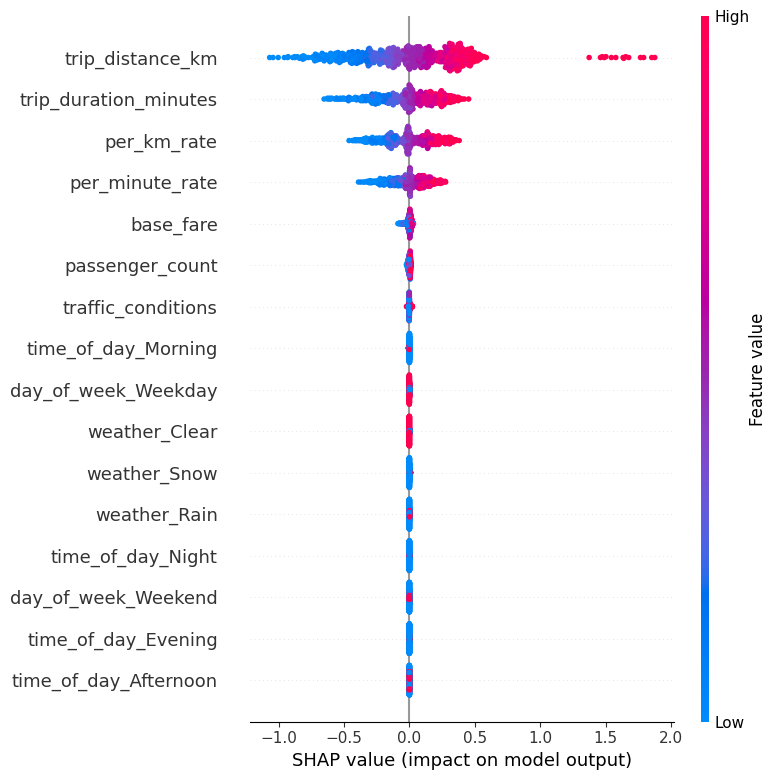

In [66]:
explainer = shap.TreeExplainer(grad_model)
shap_values = explainer.shap_values(X_train_encoded)
shap.summary_plot(shap_values, X_train_encoded, feature_names=feature_names)

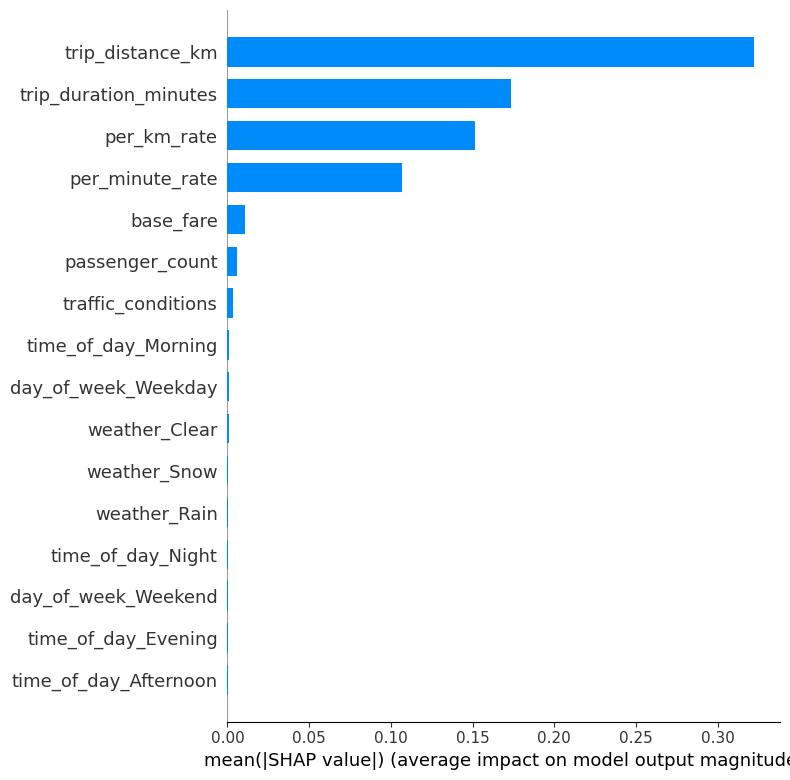

In [67]:
shap.summary_plot(shap_values, X_train_encoded, feature_names=feature_names, plot_type="bar", show=True)

- The features that strongly influence the fare prediction are:
**trip_distance_km, trip_duration_minutes, per_km_rate, per_minute_rate, and base_fare.**

- Meanwhile, all remaining features—such as weather conditions, time-of-day indicators, day-of-week, traffic level, and passenger count **show very minimal contribution**.

## **14. Conclusion and Recommendations**

### **Conclusion**
1. The Gradient Boosting Regressor model **effectively predicts taxi fares with strong accuracy**, particularly **for trips under $150**, demonstrating its reliability for everyday fare estimation.

2. Key features such as trip **distance, duration, and pricing rates predominantly drive fare predictions**, while factors like **weather and traffic have minimal impact**.

### **Recommendations**

#### **Data Recommendations:**
1. **Collect More High-Fare Trip Data:** The model struggles with accurately predicting high-fare trips due to a lack of sufficient training examples in this range. Gathering more data on longer or premium trips would help the model learn patterns associated with higher prices, improving its accuracy for these cases.  
2. **Add More Granular Features:** Incorporating additional features such as exact hour of the day, special event indicators, or more detailed weather conditions could provide the model with richer context, potentially enhancing its predictive capabilities.  
3. **Incorporate Real-Time Traffic Data:** Integrating real-time traffic information could help the model account for dynamic conditions that affect trip duration and pricing, leading to more accurate fare predictions.


#### **Model Recommendations:**
1. **Use a Two-Stage Modeling Framework**: The residual plots show that the current model is highly accurate for fares below $150 but breaks down for high-fare trips. This suggests two distinct data sections. Implementing a two-stage pipeline—first classifying whether a trip is “normal fare” or “high fare,” and then applying a dedicated regressor for each group—allows each model to learn patterns specific to its range.  
2. **Train a Specialized High-Fare Regressor**: The extreme errors in expensive trips indicate that the model has too few examples to generalize their behavior. Training a separate model exclusively on trips above $150 helps capture the unique dynamics of long-distance or premium trips, significantly reducing prediction variance in this upper range.


#### **Business Recommendations:**
1. **Re-evaluate the Current Pricing Strategy**: By SHAP analysis, we know that the pricing formula is rigid (highly dependent on duration dan distance) and not capture the real trip complexity. The business should evaluate whether relying solely on these four variables is still relevant, especially when other companies increasingly incorporate more contextual pricing.  
2. **Implement Dynamic Pricing Models**: Consider adopting dynamic pricing strategies that adjust fares based on real-time factors such as demand, traffic conditions, and weather. This approach can help optimize revenue while providing fair pricing to customers during peak times or adverse conditions.  

## **15. Save Final Model**

In [68]:
#best_model
best_gb_model

,regressor,Pipeline(step...sample=0.9))])
,transformer,FunctionTrans...func 'expm1'>)
,func,None
,inverse_func,None
,check_inverse,True
,transformers,"[('num', ...), ('traffic_ord', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False


In [69]:
#fitting
best_gb_model.fit(X, y)

,regressor,Pipeline(step...sample=0.9))])
,transformer,FunctionTrans...func 'expm1'>)
,func,None
,inverse_func,None
,check_inverse,True
,transformers,"[('num', ...), ('traffic_ord', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False


In [70]:
#save pickle
pickle.dump(best_gb_model, open('model_gb.sav', 'wb'))

In [71]:
#load model
model_load = pickle.load(open('model_gb.sav', 'rb'))
model_load

,regressor,Pipeline(step...sample=0.9))])
,transformer,FunctionTrans...func 'expm1'>)
,func,None
,inverse_func,None
,check_inverse,True
,transformers,"[('num', ...), ('traffic_ord', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
